# Linear regression tutorial


##### improved from https://towardsdatascience.com/introduction-to-linear-regression-in-python-c12a072bedf0


#### The basic idea
The basic idea is that if we can fit a linear regression model to observed data, we can then use the model to predict any future values. For example, let’s assume that we have found from historical data that the price (P) of a house is linearly dependent upon its size (S) — in fact, we found that a house’s price is exactly 90 times its size. The equation will look like this:

P = 90 * S

[ Note that the unit of x, meters, cancels out

P = 90 dollars/meters * S meters = 90 * S dollars
]


With this model, we can then predict the cost of any house. If we have a house that is 1,500 square feet, we can calculate its price to be:

P = 90*1500 = $135,000 

This concept is commonly taught in Algebra in the form of:

$y = mx + b$, where m is the slope and it is equal to $ \Delta y $ / $ \Delta x $, and b is the y-intersect (or bias), the value y at x = 0.

$y$ is the dependent variable, because it depends on x, meaning it varies with it.  $x$ is the independent variable since its value is, in theory, independent from that of other variables. 

A value of $\beta > 0$ or $\beta<0$ implies that x and y are correlated.

In statistical learning, the notation changes to $y = \beta_1 x + \beta_0 $, absorbing both parameters into the vector $ \beta  = [m, b] =  [ \beta_1, \beta_0] $, which is a cleaner notation to do math and to generalize the problem beyond a single independent variable, x.  We will use the statistical learning notation for the tutorial for these reasons.

However, perhaps the best way to think of a linear model is to think of m or $\beta_1$ as a weight as $\beta_0$ as a bias.

$y = weight * x + bias$



#### The model

There are two kinds of variables in a linear regression model:

The input or predictor variable is the variable(s) that help predict the value of the output variable. It is commonly referred to as X.
The output variable is the variable that we want to predict. It is commonly referred to as Y.
To estimate Y using linear regression, we assume the equation:

$y_e = \beta_1 x + \beta_0 $
where $y_e$ is the estimated or predicted value of Y based on our linear equation.

Our goal is to find statistically significant values of the parameters $\beta_1$ and $ \beta_0 $ that minimise the difference between the true Y and our estimate $y_e$.


This practical tutorial will show how to acomplish this using the library sci-kit learn.  A basic machine learning primer follows the Tutorial. These sections introduce other important concepts such as model evaluation and crossvalidation.  

A description of a theoretical solution to to this problem can be found in the (Appendix), as well as a numerical solution coded from scratch. These sections set the stage for machine learning, and can help build useful intuitions on the subject since ML combines similar theoretical intuitions with efficient algorithms for numerical computations to solve these types of problems.  A small machine learning appendix is also include.  The appendix is absolutely not obligatory to understand and apply Linear regression and/or machine learning, which is why we begin with the Practical Tutorial straight away.  


# Practical Tutorial

# Load Libraries

In [1]:
# Load standard libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Load simple Linear regression library
from sklearn.linear_model import LinearRegression


# Load and visualize data

In [2]:
# Import and display first five rows of advertising dataset
data = pd.read_csv('advertising.csv')
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


Text(0, 0.5, 'Sales')

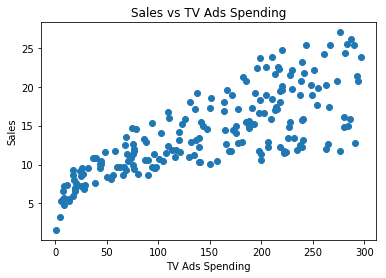

In [3]:
# Plot Sales data against TV advertising spending
plt.scatter(data.TV, data.sales)
plt.title('Sales vs TV Ads Spending')
plt.xlabel('TV Ads Spending')
plt.ylabel('Sales')

# Linear Regression of Sales onto TV Ads

We apply the linear model

$y = \beta_1 x + \beta_0 $

to model sales as a function of TV ads spending, that is:

$sales = \beta_1 TV + \beta_0 $

Where $y = \beta_1 x$ represents the linear relationship between x and y, where parameter $\beta_1$ is the weight that needs to be applied to x to transform it into y, and $\beta_0$ $ is the baseline (e.g. the y-intersect or mean bias of the model).

Ignoring the effects of any other variables, $ b_0 $ tells us how many sales occur when TV Ads spending is 0.

Parameters $\beta_0 $ and $\beta_1$ are chosen such that the difference between the model output $y_{e} = \beta_1 x + \beta_0$ and the true value of $y_{true}$ is at its minimum value.  This is done automatically by sci-kit learn using the Ordinary Least Squares algorithm (see Apendix).  

In [4]:
# Build linear regression model using TV as predictor
# Split data into predictors X and output Y
predictors = ['TV']
X = data[predictors]
y = data['sales']

# Initialise and fit model
lm = LinearRegression()
model = lm.fit(X, y)

# Print Coefficients
print(f'beta_0 = {model.intercept_}')
print(f'beta = {model.coef_}')

beta_0 = 7.032593549127693
beta = [0.04753664]


### Sales =  0.0475*TV + 7.03

Text(0, 0.5, 'Sales')

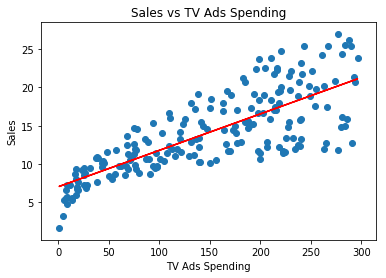

In [5]:
# Overlay the linear fit to the plot of sales vs tv spending
linear_prediction = model.predict(X)
plt.plot(data.TV, linear_prediction, 'r')
plt.scatter(data.TV, data.sales)
plt.title('Sales vs TV Ads Spending')
plt.xlabel('TV Ads Spending')
plt.ylabel('Sales')

# Exercise

### Do a linear regression of sales onto Radio Ads Spending (radio), then plot the data and overlay the linear fit.

### Please rename the variable linear_prediction (e.g.  linear_prediction_radio), all other variables can be overwritten.

##### (The variable linear_prediction is used later in the code for comparing the accuracy of different models)


In [6]:
# Exercise Code




# Can we do better with a quadratic term in the model?
## $y = \beta_2  x^2 + \beta_1  x^1 + \beta_0 $

In [7]:
# Build linear regression model using TV and TV^2 as predictors
# First we have to create variable TV^2, we simply add it to the dataframe data

data['TV2'] = data['TV']*data['TV']
predictors = ['TV', 'TV2']
X = data[predictors]
y = data['sales']

# Initialise and fit model
lm2 = LinearRegression()
model_2 = lm2.fit(X, y)

# Print Coefficients
print(f'beta_0 = {model_2.intercept_}')
print(f'betas = {model_2.coef_}')

beta_0 = 6.114120128333106
betas = [ 6.72659270e-02 -6.84693373e-05]


### Sales =  -6.84693373e-05 * $TV^2$ + 6.72659270e-02*TV + 6.114

Text(0, 0.5, 'Sales')

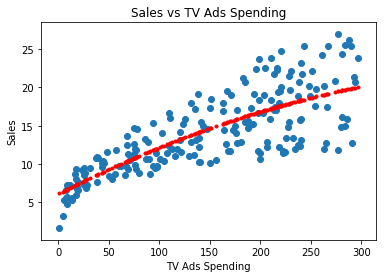

In [8]:
# Overlay the quadratic fit to the plot of sales vs tv spending
quadratic_prediction = model_2.predict(X)
plt.plot(data.TV, quadratic_prediction, '.r')
plt.scatter(data.TV, data.sales)
plt.title('Sales vs TV Ads Spending')
plt.xlabel('TV Ads Spending')
plt.ylabel('Sales')

Text(0.5, 0, 'Sales')

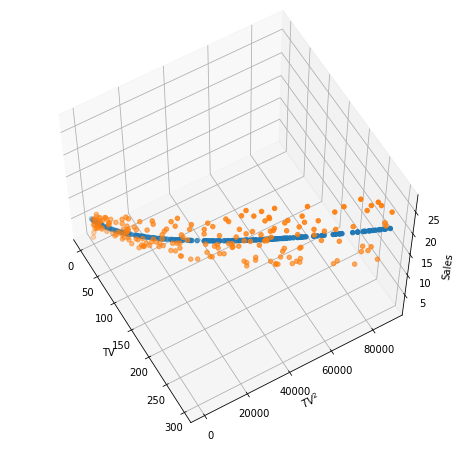

In [9]:
# We can visualize this in 3d

# This import registers the 3D projection
from mpl_toolkits.mplot3d import Axes3D  
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.TV, data.TV2, quadratic_prediction)
ax.scatter(data.TV, data.TV2, data.sales)
ax.view_init(elev=60., azim=-30)
ax.set_xlabel('TV')
ax.set_ylabel('$TV^2$')
ax.set_zlabel('Sales')


The solution $\beta = [\beta_0, \beta_1, \beta_2] $ is a vector of dimension 3, which defines plane that can be visualized with a contour plot.  


Note: 2 non-intersecting points define a line in 2d space, 3 non-intersecting points define a plane in 3d space.

Notice the model allows us to predict sales even for values of $TV$ and $TV^2$ not sampled in the available data.

Text(0.5, 0, 'Sales')

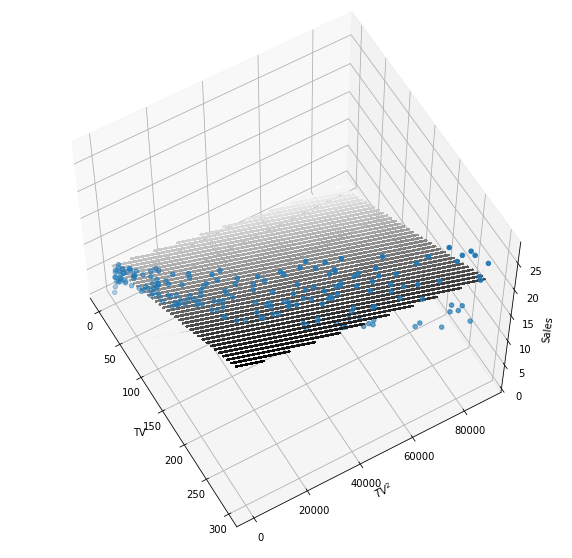

In [10]:
def f(x, x2):
    return model.intercept_ + model_2.coef_[0]*x + model_2.coef_[1]*x2

x, x2 = np.meshgrid(data.TV, data.TV2)
Z = f(x, x2)

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.contour3D(x, x2, Z, 50, cmap='binary')

ax.scatter(data.TV, data.TV2, data.sales)
ax.view_init(elev=60., azim=-30)
ax.set_xlabel('TV')
ax.set_ylabel('$TV^2$')
ax.set_zlabel('Sales')

What are these betas?  The $\beta$etas are often called weights, since they determine the weight of the relationship of the independent variable to each dependent variable.  Mathematically, they are the slope of the dependent variable (sales) along the dimension of each variable. In 3 dimensions, as in the figure above, the higher the slope, the more tilted the plane is towards that axis.  

The $\beta_1$ for the model $y = \beta_1 TV + \beta_0$  

would be the same as $\beta_1$ in the model $y =   beta_1TV+ \beta_2 radio + \beta_0$  

if and only if TV and radio are linearly independent (i.e. are not correlated).

Since TV and TV^2 are highly correlated, the $\beta_1$ for the model $y = \beta_1 TV + \beta_0$  

is guaranteed to be different than the $\beta_1$ in the model $y =   beta_1TV+ \beta_2 TV^2 + \beta_0$  

In [11]:
np.corrcoef(data.TV, data.TV2)

array([[1.        , 0.96766246],
       [0.96766246, 1.        ]])

# Model Evaluation

In order to choose a model, we need to compare their performance, in science and statistics it is common to use the 'goodness-of-fit' R2.  Business users prefer other evaluation metrics such as the Mean Absolute Percentage Error, which is expressed in units of $y$.

The coefficient of determination, denoted R2 or r2 and pronounced "R squared", is the proportion of the variance in the dependent variable that is predictable from the independent variable(s).



$ R^{2}\equiv 1-{SS_{\rm {res}} \over SS_{\rm {tot}}} $,

where 

$ SS_{\text{res}}=\sum _{i}(y_{i}-f_{i})^{2}=\sum _{i}e_{i}^{2} $

is the sum of the residual squared errors, $e_i$.

and 

$ SS_{\text{tot}}=\sum _{i}(y_{i}-{\bar {y}})^{2} $

is proportional to the variance of the data


$ \sigma^2 =\sum _{i}^{n}(y_{i}-{\bar {y}})^{2} / n$

### Bottom Line

#### R2 = 1 - Sum of the Errors / Variability in the data    

#### The higher R2 the better the model fit.  Best possible R2 score is 1.0 and it can be negative (because the model can be arbitrarily worse). 

#### A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.



In [12]:
from sklearn.metrics import r2_score

#r^2 (coefficient of determination) regression score function.

print(f'linear model = {r2_score(y, linear_prediction)}')

print(f'quadratic model = {r2_score(y, quadratic_prediction)}')


linear model = 0.611875050850071
quadratic model = 0.6190371168872755


####  In business, it is best practice to report things in business units, so metrics like the mean absolute percentage error (MAPE) can be more useful than R2.  When evaluating a model using the MAPE metric, the winnig model is the one with the lowest value.

In [13]:
# Define MAPE evaluation metric
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Here the winning model is the one with the lower MAPE 

print(f'linear model = {mean_absolute_percentage_error(y, linear_prediction)}')

print(f'quadratic model = {mean_absolute_percentage_error(y, quadratic_prediction)}')

linear model = 20.57659543920778
quadratic model = 20.031422835794753


# Multiple linear regression

The problem naturally expands to the case of more independent variables , for example with 2 variables, $x_1$ and $ x_2$ ,  $y = \beta_0 + \beta_1*x_1 + \beta_1*x_2 $

Luckily we can use the exact same code from the simple linear regression to perform a multiple linear regression.


In [14]:
from scipy import stats

# Build linear regression model using TV as predictor
# Split data into predictors X and output Y
predictors = ['TV', 'radio']

# It is good practice to z-score predictors with different units
# such that they are all varying from approximately from -2 to 2 (z-distributed)
X = stats.zscore(data[predictors])
y = data['sales']

# Initialise and fit model
lm = LinearRegression()
model = lm.fit(X, y)

# Print Coefficients
print(f'beta_0 = {model.intercept_}')
print(f'betas = {model.coef_}')

# Produce a prediction with these 2 variables
mlr_prediction = model.predict(X)

beta_0 = 14.0225
betas = [3.91841179 2.78412788]


Again we visualize the model fit in 3d.  

This type of visualization is useless when we have more than 2 independent variables.

However in this case the 3d plot allows us to see that the model can predict sales even for values of $TV$ and $radio$ not sampled in the available data.


Text(0.5, 0, 'Sales')

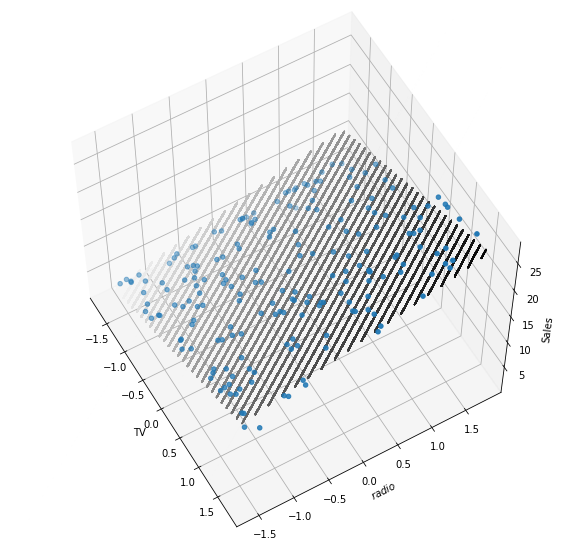

In [15]:
def f(X, Y):
    return model.intercept_ + model.coef_[0]*X + model.coef_[1]*Y

X, Y = np.meshgrid(stats.zscore(data.TV), stats.zscore(data.radio))
Z = f(X,Y)

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')

ax.scatter(stats.zscore(data.TV),stats.zscore(data.radio),data.sales)
ax.view_init(elev=60., azim=-30)
ax.set_xlabel('TV')
ax.set_ylabel('$radio$')
ax.set_zlabel('Sales')

In [16]:
# Lets compare the 3 models first with R2

print(f'linear model = {r2_score(y, linear_prediction)}')

print(f'quadratic model = {r2_score(y, quadratic_prediction)}')

print(f'multiple linear regression = {r2_score(y, mlr_prediction)}')



linear model = 0.611875050850071
quadratic model = 0.6190371168872755
multiple linear regression = 0.8971942610828956


In [17]:
# and now with MAPE

print(f'linear model = {mean_absolute_percentage_error(y, linear_prediction)}')

print(f'quadratic model = {mean_absolute_percentage_error(y, quadratic_prediction)}')

print(f'multiple linear regression = {mean_absolute_percentage_error(y, mlr_prediction)}')


linear model = 20.57659543920778
quadratic model = 20.031422835794753
multiple linear regression = 13.884310851781148


# Exercise
As an exercise, use TV, Radio, and Newspaper to predict sales using the linear model

In [18]:
# Code exercise


# Machine Learning Primer

### Crossvalidation (Train/Test Split)
In statistical learning and machine learning it is very common to split the data set into a training set that is used to fit the model, and a testing set that is used to evaluate the performance of the model on previously unseen data.  This is called cross-validation, and it is one of the main tools we use to assure ourselves that the model is actually learning a relationship, rather than overfitting (i.e. memorizing what it has seen). 


It is best practice to choose the model with the best test set performance.



In [19]:
from sklearn.model_selection import train_test_split

predictors = ['TV', 'radio', 'newspaper']

# It is good practice to z-score predictors with different units
X = data[predictors]
X_c = stats.zscore(X)
y = data['sales']

# Test set (test_size) is typically between 0.1 to 0.3 of the data
X_train, X_test, y_train, y_test = train_test_split(
    X_c, y, test_size=0.2)

model = LinearRegression().fit(X_train, y_train)

print(f'Betas = {model.coef_}')

print(f'R2 Score = {model.score(X_test, y_test)}')

print(f'MAPE = {mean_absolute_percentage_error(y_test,model.predict(X_test))}')


Betas = [ 3.77658052  2.9590877  -0.1551511 ]
R2 Score = 0.8189041663158041
MAPE = 27.29875112251749


### Random Forest Regression
##### Default settings

RandomForest and other tree-based methods such as XGBoost often perform very well right out of the box, without the need for any tuning by the user.

In [20]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor()
regr.fit(X_train, y_train)  


print(f'Feat.Importance = {regr.feature_importances_}')

print(f'r2 = {r2_score(y_test, regr.predict(X_test) )}')


print(f'MAPE = {mean_absolute_percentage_error(y_test, regr.predict(X_test) )}')

Feat.Importance = [0.65609161 0.33206104 0.01184735]
r2 = 0.9750072862331716
MAPE = 8.70855754014881


C:\Users\e351722\AppData\Local\Continuum\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


<Figure size 1080x504 with 0 Axes>

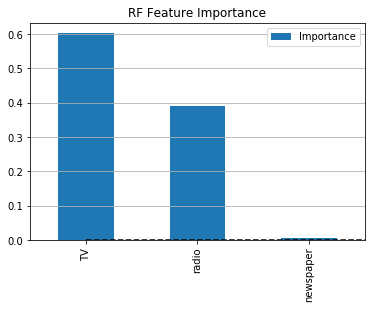

In [21]:
features = regr.fit(X_train, y_train).feature_importances_
feature_imp_df = pd.DataFrame({'Importance': features},
                                  index=X.columns.ravel()).sort_values('Importance', ascending=False)
n=20
plt.figure(figsize=(15, 7))
feature_imp_df.head(n).plot(kind='bar')
plt.grid(True, axis='y')
plt.title('RF Feature Importance')
plt.hlines(y=0, xmin=0, xmax=n, linestyles='dashed');

### RandomForestRegressor often performs better than LinearRegression.  

### Importantly, we did not clean up the data (i.e. remove outliers) before modeling.  Outliers typically introduce strong biases on the weights ($\beta$), which can lead to bad predictions on test data.  Thus, data cleaning is an important pre-processing step that should be considered when fitting linear models.

### In contrast, RandomForest is a lot more robust to outliers or missing data, and these do not need to be removed before modeling.  This is because RandomForest isolates outliers in separate leafs covering small regions of the feature space, meaning they will not impact the mean of other leafs.  This is one of the reasons that RandomForest is considered an "off-the-shelf" ready to use algorithm.


## Food for thought


# The End

# Linear regression Appendix

Let's try to solve the simple linear model without using sci-kit learn!

In [22]:
# Build linear regression model using TV as predictor
# Split data into predictors X and output Y
X = data['TV']
y = data['sales']


### Ordinary Least Squares 

We want to find an approximation or estimate $y_e$ for variable $y$ which has the smallest error possible.
This can be accomplished by minimize the residual sum of squared errors (RSSE).  The squared term is so that positive and negative deviations from $y$ are penalized equally.

residual sum of squared errors = $\sum _{i=1}^{n}(y_{i}-x_{i}^{\mathrm {T} }\beta)^{2}=(y-X\beta)^{\mathrm {T} }(y-X\beta)$

We next show how numerical (trial and error) methods can be used in order to find the value of vector $\beta$ that produces the smallest sum of the squared values.  However for the linear model it is actually posible to find an analytial solution (a formula) with a bit of calculus.

We will skip the calculus, but highlight that since our goal is to minimize the RSSE, and this quantity depends on $\beta^2$, we know that we can always find a solution since RSSE is a quadratic equation (i.e. it is a parabolla, see numerical solution for a visual). 


## Analytical Solution

The bit of calculus involves taking the derivative of RSSE and setting it equal to zero in order to solve for $\beta$, but we skip the proof and jump to the result.

It can be shown that $\beta_1 = Cov(X, Y) / Var(X) $.

Using the computed value of $\beta_1$,  we can then find $\beta_0 = \mu_y - \beta_1 * \mu_x $

, where $\mu_x $ and $\mu_y$ are the means of x and y.

In [23]:
# We skip the calculus, and just show that the analytical formulas give the same result as sci-kit learn

# Calculate the mean of X and y
xmean = np.mean(X)
ymean = np.mean(y)

# Calculate the terms needed for the numator and denominator of beta
xycov = (X - xmean) * (y - ymean)
xvar =  (X - xmean)**2 

# Calculate beta and alpha
beta = xycov.sum() / xvar.sum()
alpha = ymean - (beta * xmean)
print(f'alpha = {alpha}')
print(f'beta = {beta}')


alpha = 7.0325935491276965
beta = 0.047536640433019736


# Sci-kit learn

In [24]:
# Compare this to what we got using sci-kit learn

predictors = ['TV']
X = data[predictors]
y = data['sales']

# Initialise and fit model
lm = LinearRegression()
model = lm.fit(X, y)

# Print Coefficients
print(f'beta_0 = {model.intercept_}')
print(f'beta = {model.coef_}')

beta_0 = 7.032593549127693
beta = [0.04753664]


# Numerical solution
Let's iteratively take some brute-force guesses of the values of $\beta_1$ and $\beta_0$ and record their performance in terms of the sum of residual squared errors.

In [25]:
# This can take a couple minutes, it's the worst algorithm one could write, but it gets the job done.
rss = []
beta1s = []
beta0s = []

# We cheat a bit narrowing our search for the optimal Betas on range 1 and range 2
range1 =  np.linspace(-1,1,200)
range0 = np.linspace(0,10,200)

# Compute the RSS over all values of range 1 and range 0
for beta1 in range1:
    for beta0 in range0:
        rss.append(np.sum((y-(X['TV']*beta1+beta0))**2))
        beta1s.append(beta1)
        beta0s.append(beta0)

In [26]:
# Print the solution
print(f'beta_0 = {beta0s[np.argmin(rss)]}')
print(f'beta = {beta1s[np.argmin(rss)]}')

beta_0 = 7.386934673366834
beta = 0.045226130653266416


Text(0.5, 0.92, ' Cost Function (RSS vs Betas)')

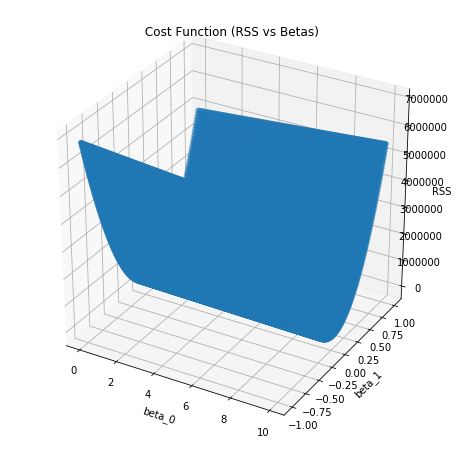

In [27]:
# We visualize the Betas and their corresponding RSS

from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(beta0s, beta1s, rss)
ax.scatter(beta0s[np.argmin(rss)], beta1s[np.argmin(rss)], np.min(rss), c = 'r', s = 50)

ax.set_xlabel('beta_0')
ax.set_ylabel('beta_1')
ax.set_zlabel('RSS')
ax.set_title(' Cost Function (RSS vs Betas)')


The Residual Sum of Squares has a concave shape by construction, since we defined it as a parabolla.  This makes the RSS a good Cost Function to evaluate different model parameters in order to choose the ones that minimize mistakes because:

1) it is guaranteed to have a minimum 

2) It is possible to compute this minimum using numerical methods that are much more efficient than the brute force approach we wrote.  For example, say we start with completely Random weights, and compute the RSS.  Then we change the weights a little (say, make one weight a little bigger) and produce a new prediction. If this prediction has a lower RSS than our previous guess, we can make the weight yet a little bigger and again see if RSS improves again.  If we produce a worse prediction (higher RSS), we can modify the weights in the opposite direction (e.g. make the weight a little smaller).  Applying this iterative process to all the weights until we cannot longer improve our RSS by more than some threshold value would eventually find us the minimum RSS.   

##### This is the basic idea underlying Gradient decent, which is how machine learning alrorithms minimize their cost function (also known as an objective function).

Gradient descent is an optimization algorithm used to minimize some function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient.  A gradient is a multidimensional derivative (i.e. a fancy name for a slope).  A lot of research has been done to guarantee the learning algorithms go down the sleepest slope, 99% of data scientists, including myself, just take it for granted and use Adam because this is the default setting.  Really, I just read a blog like this one to learn a bit more about it, not even a paper.

https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/

##### There are other useful Cost Functions, but RSS (also known as mean squared error) is the one most commonly used for regression.

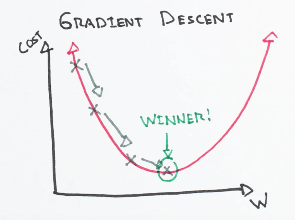

# Machine Learning Primer Appendix

### K-Fold Crossvalidation


The training set can actually be sub-split into a train/test and evaluate the model fit more precisely (prevents bias).

This process can be done automatically for you many times using cross_val_score.

In [28]:
# ideally, k-fold crossvalidation is used during model parameter fitting on training data, and a test data for evaluation

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, scoring="r2", cv=5)
print(scores)

[0.86915299 0.88935708 0.92831244 0.92714519 0.90588424]


# Random Forest Regression 
## (with k-fold crossvalidation and custom hyperparameters)


These options will become more important as we have more input features.

There are 2 crucial parts to machine learning: 

1) Engineering good features for the model, and eliminating bad ones

2) Hyper-parameter tuning. 

1 is a lot more important than 2 in my experience.

In [29]:
from sklearn.model_selection import GridSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 2)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 2)]

# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'bootstrap': bootstrap}


regr = RandomForestRegressor()

grid_regr = GridSearchCV(regr, param_grid, cv=5)
grid_regr.fit(X_train, y_train)


print(f'r2 = {r2_score(y_test, grid_regr.predict(X_test) )}')


print(f'MAPE = {mean_absolute_percentage_error(y_test, grid_regr.predict(X_test) )}')

r2 = 0.9767050221661856
MAPE = 9.134825516469206
